<a href="https://colab.research.google.com/github/cristiangodoyangel/Analisis-Ventas-Retail-Data-Science/blob/main/Analisis_Sales_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/0002 Python - Data Science/Datasets/retail_sales_dataset.csv"
df_1 = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:


print("\n")
print("================================================ Ventas Retail =================================================")
print("\n")


print("================================== Comprobación de carga exitosa del dataset ===================================")

print(df_1.head(10))

print("\n")
print("=============================================== Ultimas 5 filas ================================================")
print(df_1.tail(5))

print("\n")



================================================ Ventas Retail =================================================


================================== Comprobación de carga exitosa del dataset ===================================
   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   
5               6 2023-04-25     CUST006  Female   45           Beauty   
6               7 2023-03-13     CUST007    Male   46         Clothing   
7               8 2023-02-22     CUST008    Male   30      Electronics   
8               9 2023-12-13     CUST009    Male   63      Electronics   
9              10 2023-10-07  

In [6]:

print("=========================================== Información del dataset ============================================")
print(df_1.info())

print("\n")
print("======================================= Resumen estadístico del dataset ========================================")
print(df_1.describe().T.round(1))

print("\n")
print("========================================= Tipos de datos del dataset ===========================================")
print(df_1.dtypes)

print("\n")
print("===================================== Cantidad de productos por categoría ======================================")
print(df_1["Product Category"].value_counts())


=========================================== Información del dataset ============================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       1000 non-null   int64         
 1   Date                 1000 non-null   datetime64[ns]
 2   Customer ID          1000 non-null   object        
 3   Gender               1000 non-null   object        
 4   Age                  1000 non-null   int64         
 5   Product Category     1000 non-null   object        
 6   Quantity             1000 non-null   int64         
 7   Price per Unit       1000 non-null   int64         
 8   Total Amount         1000 non-null   int64         
 9   Total_Normalized     1000 non-null   float64       
 10  Nivel_Venta          1000 non-null   object        
 11  Desviación_vs_Media  1000 non-null 

In [7]:

print("\n")
print("============================================== Categorías únicas ===============================================")
# El core nos pide contar las "Tiendas" únicas, pero el dataset no tiene una columna de "Tiendas", lo hice con Product Category.
print(df_1["Product Category"].unique())


print("\n")
print("====================================== Ventas con preicio mayores a 150 =======================================")
print(df_1[df_1["Total Amount"] > 150])
# El core nos pide filtrar ventas menores a 0.5 precio unitario, pero no existen, para ser mas coherente hice el anterior.superior a 150 y este menor a 100
print("\n")
print("======================================= Ventas con precio menores a 100 =======================================")
print(df_1[df_1["Total Amount"] < 100])





============================================== Categorías únicas ===============================================
['Beauty' 'Clothing' 'Electronics']


====================================== Ventas con preicio mayores a 150 =======================================
     Transaction ID       Date Customer ID  Gender  Age Product Category  \
1                 2 2023-02-27     CUST002  Female   26         Clothing   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
8                 9 2023-12-13     CUST009    Male   63      Electronics   
9                10 2023-10-07     CUST010  Female   52         Clothing   
12               13 2023-08-05     CUST013    Male   22      Electronics   
..              ...        ...         ...     ...  ...              ...   
983             984 2023-08-29     CUST984    Male   56         Clothing   
985             986 2023-01-17     CUST986  Female   49         Clothing   
986             987 2023-04-29     CUST987  Female 

In [8]:
#Utilizando el método query(), filtra el DataFrame para mostrar las filas donde el producto sea Electronics y las ventas sean mayores a 30.
print("\n")
print("=================================== Ventas de Electronics con precio mayor a 30 ===============================")
cond1 = df_1["Product Category"] == "Electronics"
cond2 = df_1["Total Amount"] > 30
print(df_1[cond1 & cond2])

print("\n")
print("============================================ Ventas por Producto ==============================================")
print(df_1.loc[:, ["Product Category", "Total Amount"]])

print("\n")
print("========================================== Ventas por Género (filtrado) ========================================")
# el Core pide Tienda, pero el dataset no tiene una columna de "Tiendas", lo hice con Gender.
print(df_1.loc[4:10, ["Gender", "Product Category"]])

print("\n")
print("======================= Muestra del Dataset (5 primeras filas y 3 primeras columnas) ===========================")
print(df_1.iloc[:5, :3])






=================================== Ventas de Electronics con precio mayor a 30 ===============================
     Transaction ID       Date Customer ID  Gender  Age Product Category  \
7                 8 2023-02-22     CUST008    Male   30      Electronics   
8                 9 2023-12-13     CUST009    Male   63      Electronics   
12               13 2023-08-05     CUST013    Male   22      Electronics   
14               15 2023-01-16     CUST015  Female   42      Electronics   
17               18 2023-04-30     CUST018  Female   47      Electronics   
..              ...        ...         ...     ...  ...              ...   
984             985 2023-05-30     CUST985  Female   19      Electronics   
991             992 2023-08-21     CUST992  Female   57      Electronics   
992             993 2023-02-06     CUST993  Female   48      Electronics   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male

In [9]:

# Creamos una nueva columna que representa el ingreso total por cada venta
# Si ya existe 'Total Amount', asumimos que es el ingreso. Si no, sería cantidad * precio_unitario
# df_1['Total Amount'] = df_1['Quantity'] * df_1['Unit Price']

# Normalizamos la columna de Total Amount entre 0 y 1
max_val = df_1['Total Amount'].max()
min_val = df_1['Total Amount'].min()
df_1['Total_Normalized'] = df_1['Total Amount'].apply(lambda x: (x - min_val) / (max_val - min_val))

# Clasificamos las ventas según su monto en categorías: 'Baja', 'Media', 'Alta'
def clasificar_venta(valor):
    if valor >= 200:
        return 'Alta'
    elif valor >= 100:
        return 'Media'
    else:
        return 'Baja'

df_1['Nivel_Venta'] = df_1['Total Amount'].apply(clasificar_venta)

print("\n")
print("========================================== Nivel de Venta ================================================")
print(df_1.loc[:, ["Total Amount", "Nivel_Venta"]])


# Agrupamos por categoría de producto y género del cliente (como ejemplo alternativo a "tienda")
agrupado = df_1.groupby(['Product Category', 'Gender'])

# Aplicamos funciones de agregación para obtener estadísticas por grupo
resumen_agrupado = agrupado['Total Amount'].agg(['sum', 'mean', 'count', 'min', 'max', 'std', 'var'])

# Mostramos los resultados
print("\n=============== Estadísticas de ventas por Producto y Género ===============")
print(resumen_agrupado.round(2))





========================================== Nivel de Venta ================================================
     Total Amount Nivel_Venta
0             150       Media
1            1000        Alta
2              30        Baja
3             500        Alta
4             100       Media
..            ...         ...
995            50        Baja
996            90        Baja
997           100       Media
998           150       Media
999           120       Media

[1000 rows x 2 columns]

=============== Estadísticas de ventas por Producto y Género ===============
                           sum    mean  count  min   max     std        var
Product Category Gender                                                    
Beauty           Female  74830  450.78    166   25  2000  538.74  290235.44
                 Male    68685  487.13    141   25  2000  592.90  351530.08
Clothing         Female  81275  467.10    174   25  2000  577.02  332948.03
                 Male    74305  419.80    177   

/tmp/ipython-input-10-211304072.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_1['Desviación_vs_Media'] = df_1.groupby('Product Category', group_keys=False).apply(desviacion_personalizada)


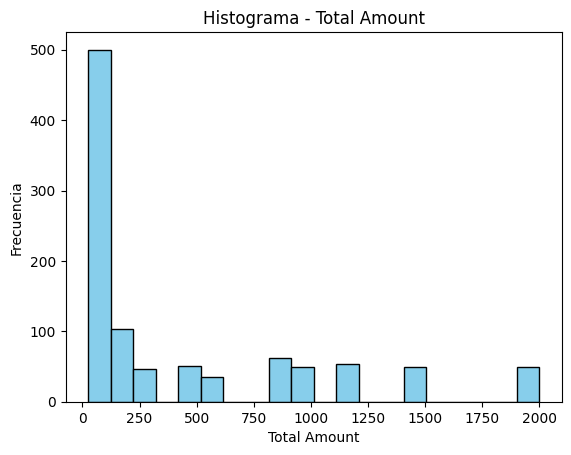

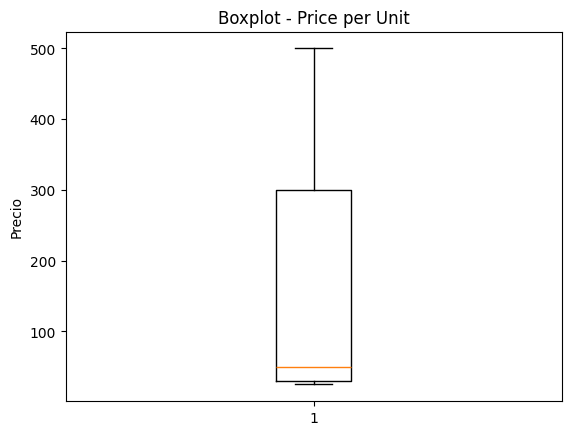

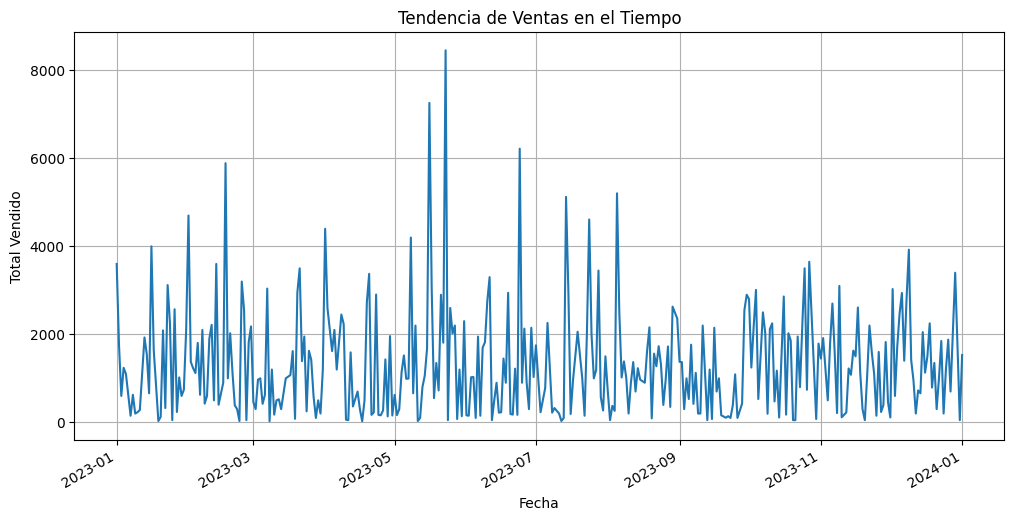

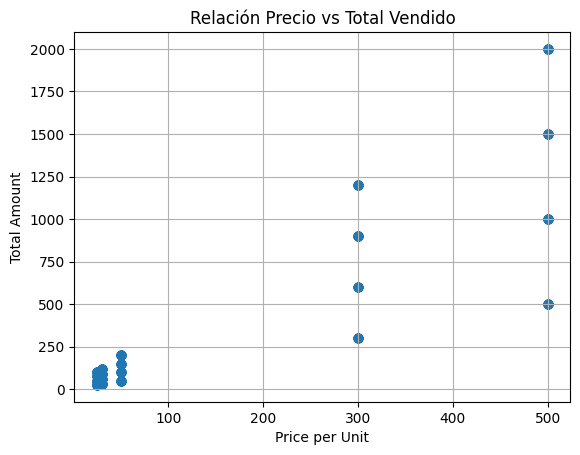

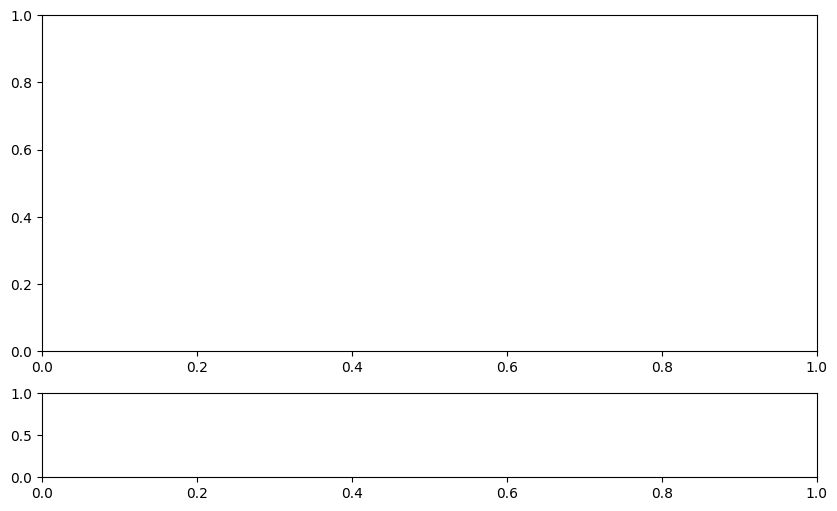

In [10]:

# Calculamos la desviación de cada venta respecto a la media de su categoría de producto
# Esto nos dice qué tan por encima o por debajo está cada venta respecto al promedio de su grupo
def desviacion_personalizada(x):
    media = x['Total Amount'].mean()
    return x['Total Amount'] - media

df_1['Desviación_vs_Media'] = df_1.groupby('Product Category', group_keys=False).apply(desviacion_personalizada)



# Histograma de Total Amount
plt.hist(df_1['Total Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma - Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de Price per Unit
plt.boxplot(df_1['Price per Unit'])
plt.title('Boxplot - Price per Unit')
plt.ylabel('Precio')
plt.show()


df_1['Date'] = pd.to_datetime(df_1['Date'])

ventas_por_fecha = df_1.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(12,6))
ventas_por_fecha.plot()
plt.title('Tendencia de Ventas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Vendido')
plt.grid()
plt.show()


plt.scatter(df_1['Price per Unit'], df_1['Total Amount'], alpha=0.6)
plt.title('Relación Precio vs Total Vendido')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.grid()
plt.show()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [4, 1]})


<Figure size 640x480 with 0 Axes>

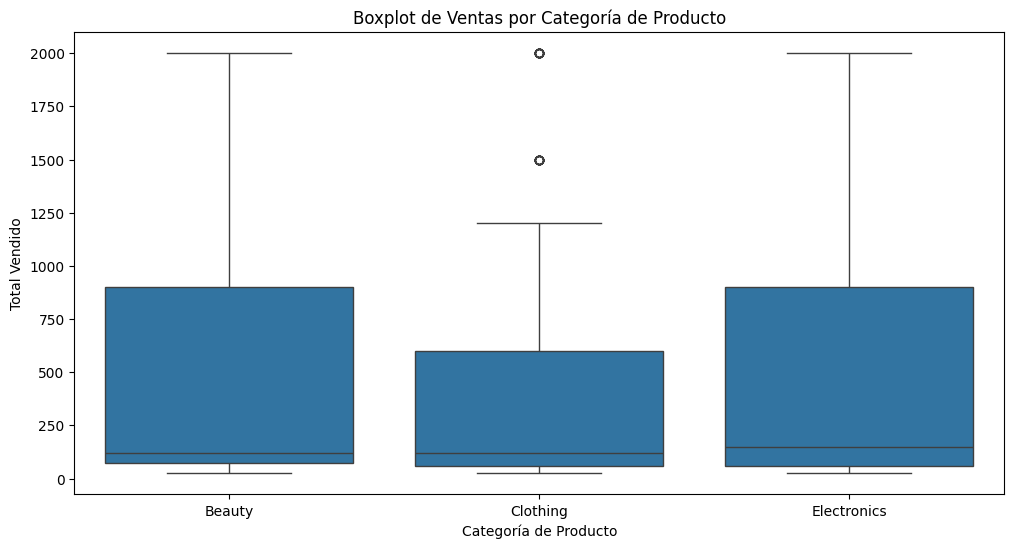

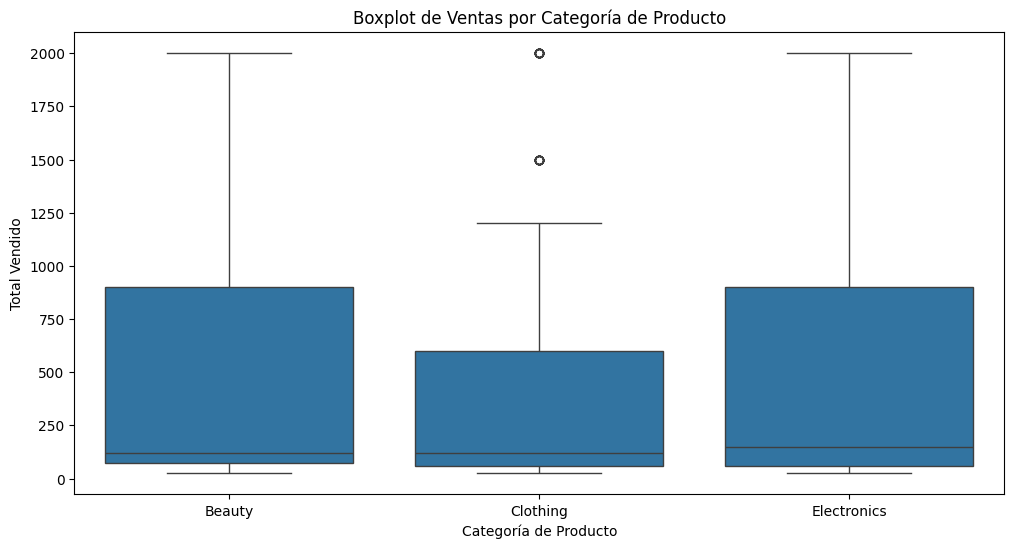

In [11]:

# Histograma
ax1.hist(df_1['Total Amount'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de Ventas')

# Boxplot
ax2.boxplot(df_1['Total Amount'], vert=False)
ax2.set_title('Boxplot de Ventas')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(x='Product Category', y='Total Amount', data=df_1)
plt.title('Boxplot de Ventas por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Total Vendido')
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(x='Product Category', y='Total Amount', data=df_1)
plt.title('Boxplot de Ventas por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Total Vendido')
plt.show()



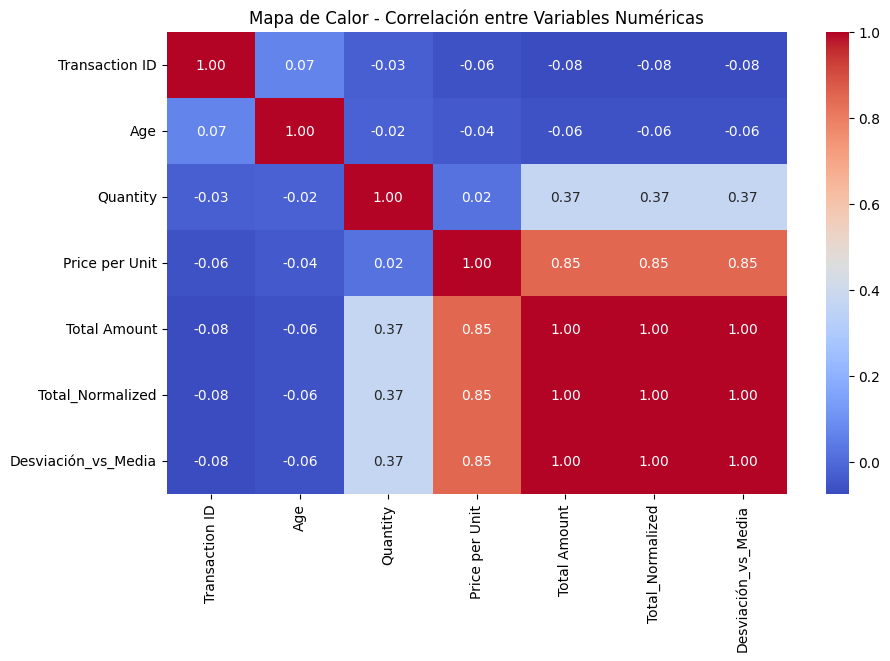

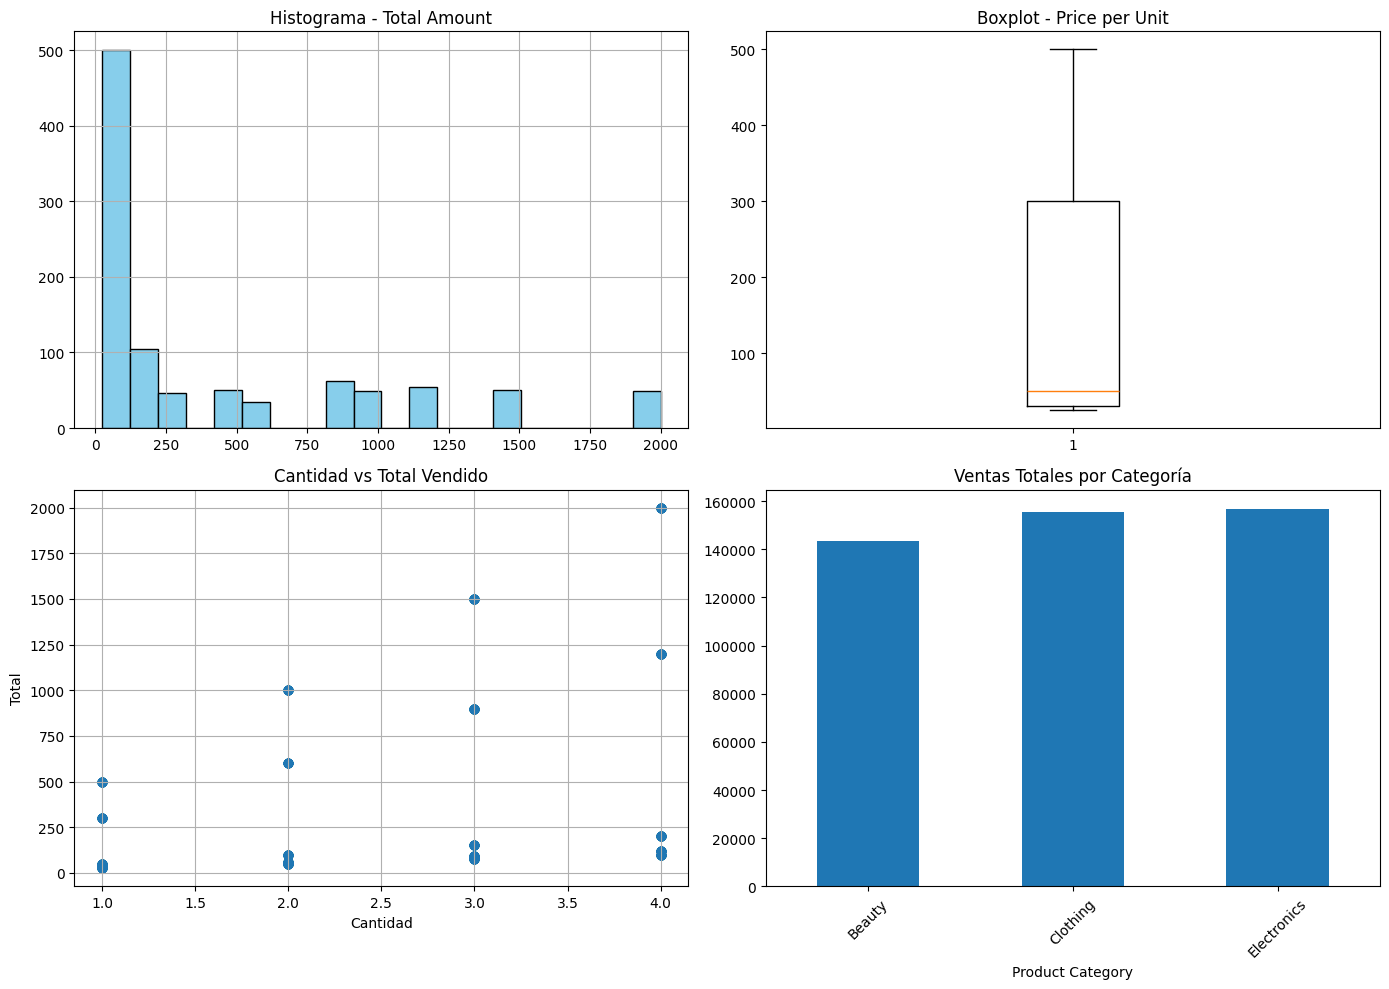

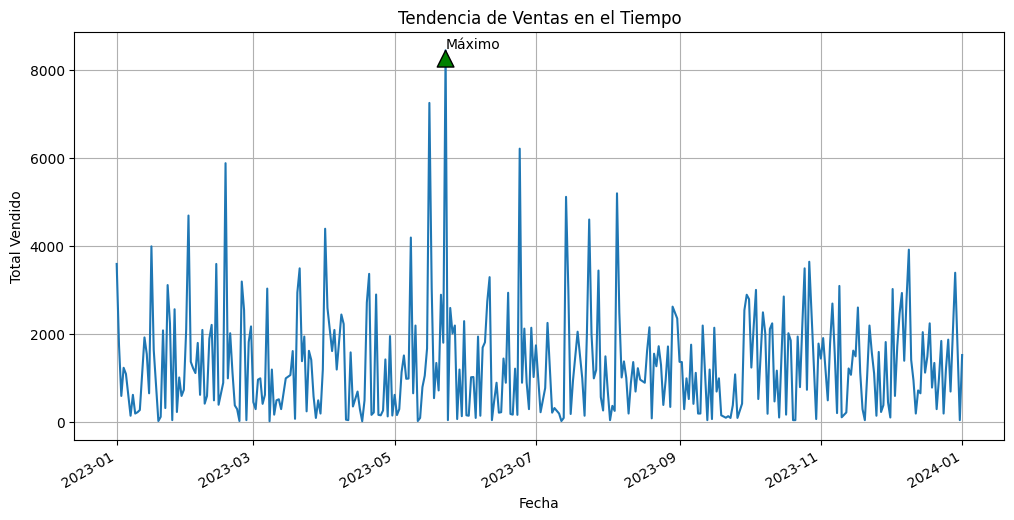

In [12]:



# Matriz de correlación solo para variables numéricas
correlacion = df_1.corr(numeric_only=True)

# Visualización con mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor - Correlación entre Variables Numéricas')
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma Total Amount
axs[0, 0].hist(df_1['Total Amount'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histograma - Total Amount')
axs[0, 0].grid()

# Boxplot Price per Unit
axs[0, 1].boxplot(df_1['Price per Unit'], vert=True)
axs[0, 1].set_title('Boxplot - Price per Unit')

# Scatter Total Amount vs Quantity
axs[1, 0].scatter(df_1['Quantity'], df_1['Total Amount'], alpha=0.6)
axs[1, 0].set_title('Cantidad vs Total Vendido')
axs[1, 0].set_xlabel('Cantidad')
axs[1, 0].set_ylabel('Total')
axs[1, 0].grid()

# Total Vendido por categoría
df_1.groupby('Product Category')['Total Amount'].sum().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Ventas Totales por Categoría')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
ventas_por_fecha.plot()
plt.title('Tendencia de Ventas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Vendido')
plt.grid()

# Agregamos una anotación con flecha
fecha_pico = ventas_por_fecha.idxmax()
valor_pico = ventas_por_fecha.max()
plt.annotate('Máximo', xy=(fecha_pico, valor_pico),
             xytext=(fecha_pico, valor_pico + 50),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10)

plt.show()

In [13]:
df_1.to_csv('/content/drive/MyDrive/0002 Python - Data Science/Datasets/retail_sales_dataset_modificado.csv', index=False)


## MACHINE LEARNING

In [14]:
# se carga el nuefo dataset, ya con EDA
path = "/content/drive/MyDrive/0002 Python - Data Science/Datasets/retail_sales_dataset_modificado.csv"
df = pd.read_csv(path)

In [16]:

# Mostrar primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Info general
print("\nInformación general del dataset:")
df.info()

# Descripción estadística
print("\nResumen estadístico:")
display(df.describe().T)

# Comprobar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Primeras filas del dataset:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_Normalized,Nivel_Venta,Desviación_vs_Media
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.063291,Media,-317.475570
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.493671,Alta,556.752137
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.002532,Baja,-428.786550
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.240506,Alta,56.752137
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.037975,Media,-367.475570



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction ID       1000 non-null   int64  
 1   Date                 1000 non-null   object 
 2   Customer ID          1000 non-null   object 
 3   Gender               1000 non-null   object 
 4   Age                  1000 non-null   int64  
 5   Product Category     1000 non-null   object 
 6   Quantity             1000 non-null   int64  
 7   Price per Unit       1000 non-null   int64  
 8   Total Amount         1000 non-null   int64  
 9   Total_Normalized     1000 non-null   float64
 10  Nivel_Venta          1000 non-null   object 
 11  Desviación_vs_Media  1000 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB

Resumen estadístico:


,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,5.005000e+02,288.819436,1.00000,250.750000,500.500000,750.250000,1000.000000
Age,1000.0,4.139200e+01,13.681430,18.00000,29.000000,42.000000,53.000000,64.000000
Quantity,1000.0,2.514000e+00,1.132734,1.00000,1.000000,3.000000,4.000000,4.000000
Price per Unit,1000.0,1.798900e+02,189.681356,25.00000,30.000000,50.000000,300.000000,500.000000
Total Amount,1000.0,4.560000e+02,559.997632,25.00000,60.000000,135.000000,900.000000,2000.000000
Total_Normalized,1000.0,2.182278e-01,0.283543,0.00000,0.017722,0.055696,0.443038,1.000000
Desviación_vs_Media,1000.0,2.910383e-14,559.908104,-442.47557,-392.475570,-320.361717,432.524430,1556.752137



Valores nulos por columna:
Transaction ID         0
Date                   0
Customer ID            0
Gender                 0
Age                    0
Product Category       0
Quantity               0
Price per Unit         0
Total Amount           0
Total_Normalized       0
Nivel_Venta            0
Desviación_vs_Media    0
dtype: int64


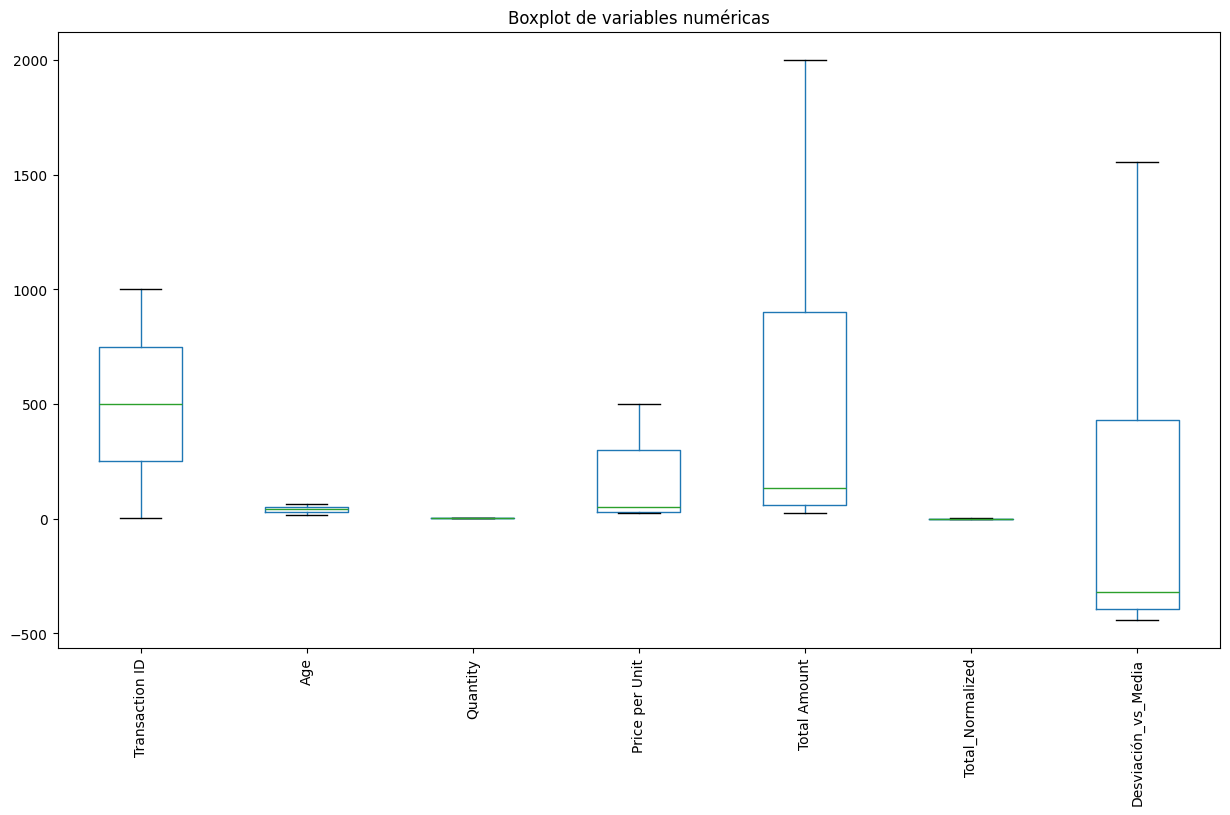

In [17]:
# Boxplots para detectar outliers en variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot de variables numéricas")
plt.grid()
plt.show()


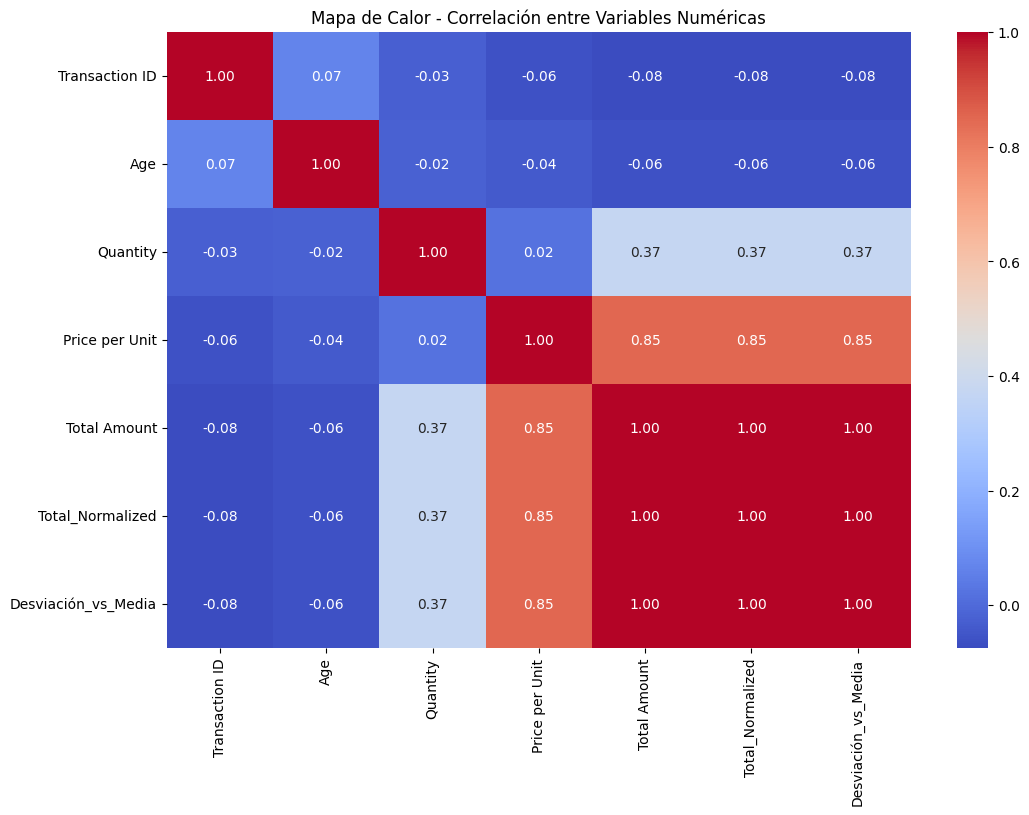

In [18]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Correlación entre Variables Numéricas")
plt.show()


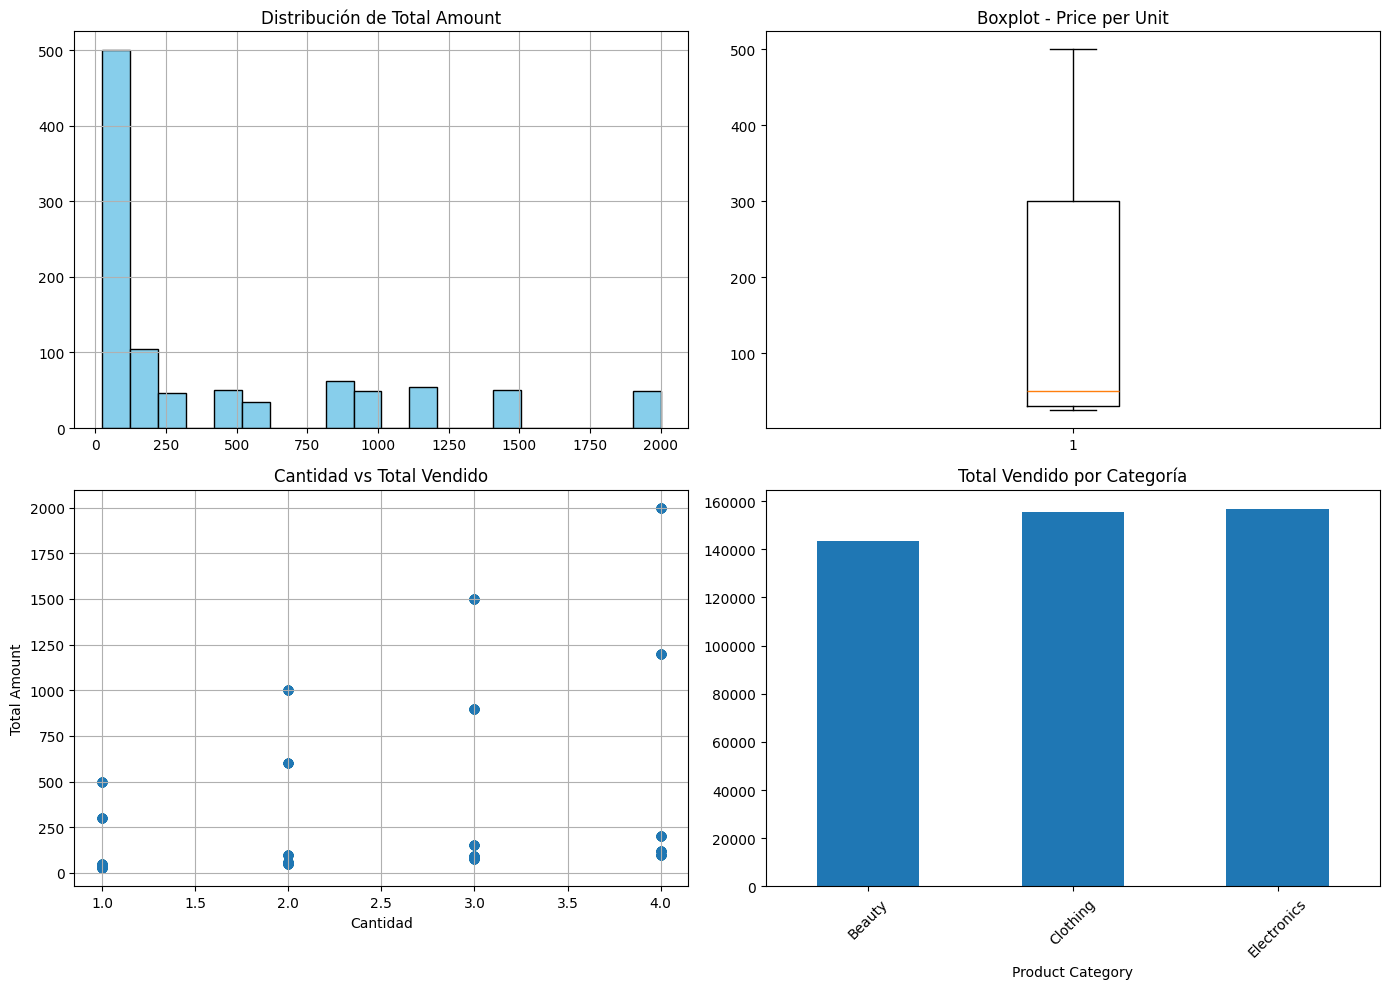

In [19]:
# Comparar variables clave en subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de ventas
axs[0, 0].hist(df['Total Amount'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribución de Total Amount')
axs[0, 0].grid()

# Boxplot de precios
axs[0, 1].boxplot(df['Price per Unit'])
axs[0, 1].set_title('Boxplot - Price per Unit')

# Scatter de cantidad vs monto
axs[1, 0].scatter(df['Quantity'], df['Total Amount'], alpha=0.6)
axs[1, 0].set_title('Cantidad vs Total Vendido')
axs[1, 0].set_xlabel('Cantidad')
axs[1, 0].set_ylabel('Total Amount')
axs[1, 0].grid()

# Barras por categoría
df.groupby('Product Category')['Total Amount'].sum().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Total Vendido por Categoría')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Rehacer X sin las columnas filtrantes
X = df.drop(columns=[
    'Nivel_Venta', 'Transaction ID', 'Date', 'Customer ID',
    'Total Amount', 'Total_Normalized', 'Desviación_vs_Media'
])
y = df['Nivel_Venta']
y_encoded = label_encoder.fit_transform(y)

# Nuevas columnas numéricas y categóricas
numeric_features = ['Age', 'Quantity', 'Price per Unit']
categorical_features = ['Gender', 'Product Category']

# Transformadores actualizados
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar transformaciones
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

In [22]:
!pip install xgboost lightgbm


In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_validate
import numpy as np

# Evaluar los mismos modelos con las nuevas features
resultados_modelos_limpios = evaluar_modelos(modelos, X_train_processed, y_train)

# Mostrar resultados actualizados
print("Benchmark de modelos (sin leakage):")
display(resultados_modelos_limpios)



Entrenando y evaluando: Logistic Regression
Entrenando y evaluando: KNN
Entrenando y evaluando: Decision Tree
Entrenando y evaluando: Random Forest
Entrenando y evaluando: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:12:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Entrenando y evaluando: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 8
[LightGBM] [Info] Start training from score -0.781296
[LightGBM] [Info] Start training from score -1.054296
[LightGBM] [Info] Start training from score -1.641187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Modelo,Accuracy,Precision,Recall,F1-score
3,Random Forest,1.00000,1.000000,1.000000,1.000000
2,Decision Tree,1.00000,1.000000,1.000000,1.000000
4,XGBoost,1.00000,1.000000,1.000000,1.000000
5,LightGBM,1.00000,1.000000,1.000000,1.000000
0,Logistic Regression,0.85625,0.818418,0.823404,0.818854
1,KNN,0.81875,0.762131,0.758851,0.757654


📋 Reporte de Clasificación:

              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00        91
        Baja       1.00      1.00      1.00        70
       Media       1.00      1.00      1.00        39

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


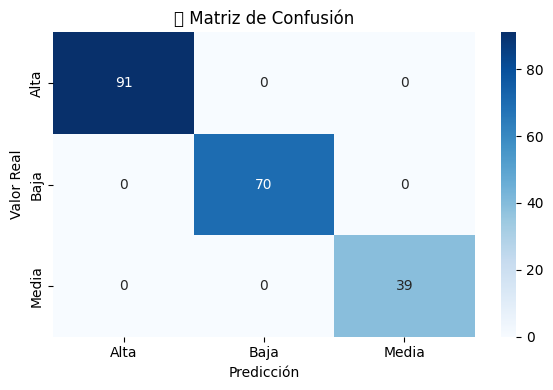

/tmp/ipython-input-27-3041387301.py:50: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


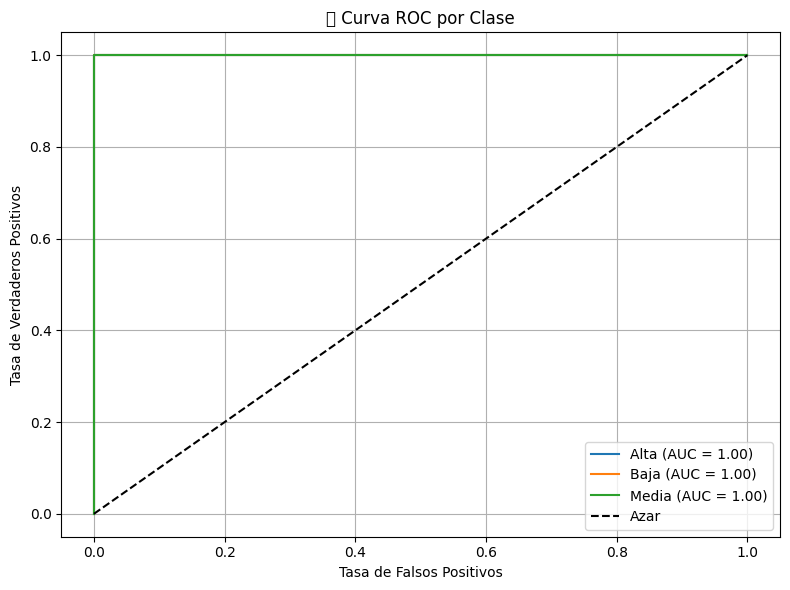

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar el modelo final
modelo_final = RandomForestClassifier()
modelo_final.fit(X_train_processed, y_train)
y_pred = modelo_final.predict(X_test_processed)

# 1. Reporte de Clasificación
print("📋 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 2. Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("🧮 Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

# 3. Curvas ROC para clasificación multiclase
# Binarizar etiquetas
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # 3 clases
y_score = modelo_final.predict_proba(X_test_processed)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# 4. Gráfico de Curvas ROC
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Azar')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('📈 Curva ROC por Clase')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
